### Листинг 1. Преобразование Хафа

Идея преобразования Хафа (англ. Hough, возможные варианты перевода Хох, Хо) заключается в поиске общих геометрических
мест точек (ГМТ). Например, данный подход используется при
построении треугольника по трем заданным сторонам, когда сначала откладывается одна сторона треугольника, после этого концы отрезка рассматриваются как центры окружностей радиусами
равными длинам второго и третьего отрезков. Место пересечения
двух окружностей является общим ГМТ, откуда и проводятся отрезки до концов первого отрезка. Иными словами можно сказать,
что было проведено голосование двух точек в пользу вероятного
расположения третьей вершины треугольника. В результате «голосования» «победила» точка, набравшая два «голоса» (точки на
окружностях набрали по одному голосу, а вне их — по нулю).

Обобщим данную идею для работы с реальными данными, когда
на изображении имеется большое количество особых характеристических точек, участвующих в голосовании. Допустим, необходимо
найти в бинарном точечном множестве окружность известного радиуса 𝑅, причем в данном множестве могут присутствовать и ложные точки, не лежащие на искомой окружности. Набор центров
возможных окружностей искомого радиуса вокруг каждой характеристической точки образует окружность радиуса R

Таким образом, точка, соответствующая максимальному пересечению числа окружностей, и будет являться центром окружности искомого радиуса.

Классическое преобразование Хафа, базирующееся на рассмотренной идее голосования точек, изначально было предназначено
для выделения прямых на бинарных изображениях. В преобразовании Хафа для поиска геометрических примитивов используется
пространство параметров. Самым распространенным параметрическим уравнением прямых является:

𝑦 = 𝑘𝑥 + 𝑏, (1)

𝑥 cos Θ + 𝑦 sin Θ = 𝜌 (2)

где 
𝜌 — радиус-вектор, проведенный из начала координат до прямой; 
Θ — угол наклона радиус-вектора.

Пусть в декартовой системе координат прямая задана уравнением (1), из которого легко вычислить радиус-вектор 𝜌 и угол
Θ (2). Тогда в пространстве параметров Хафа прямая будет представлена точкой с координатами (𝜌0,Θ0)

Подход преобразования Хафа заключается в том, что для каждой точки пространства параметров суммируется количество голосов, поданных за нее, поэтому в дискретном виде пространство
Хафа называется аккумулятором и представляет собой некоторую матрицу 𝐴(𝜌,Θ), хранящую информацию о голосовании. Через каждую точку в декартовой системе координат можно провести
бесконечное число прямых, совокупность которых породит в пространстве параметров синусоидальную функцию отклика. Таким
образом, любые две синусоидальные функции отклика в пространстве параметров пересекутся в точке (𝜌,Θ) только в том случае,
если порождающие их точки в исходном пространстве лежат на прямой. Исходя из этого можно сделать вывод, что
для того, чтобы найти прямые в исходном пространстве, необходимо найти все локальные максимумы аккумулятора.

Рассмотренный алгоритм поиска прямых может быть таким же
образом использован для поиска любой другой кривой, описываемой в пространстве некоторой функцией с определенным числом
параметров 𝐹 = (𝑎1,𝑎2,...,𝑎𝑛,𝑥,𝑦), что повлияет лишь на размерность пространства параметров. Воспользуемся преобразованием Хафа для поиска окружностей заданного радиуса 𝑅. Известно,
что окружность на плоскости описывается формулой (𝑥 − 𝑥0)^2 + (𝑦 − 𝑦0)^2 = 𝑅^2. Набор центров всех возможных окружностей радиуса 𝑅, проходящих через характеристическую точку, образует
окружность радиуса 𝑅 вокруг этой точки, поэтому функция отклика в преобразовании Хафа для поиска окружностей 
представляет окружность такого же размера с центром в голосующей точке.
Тогда аналогично предыдущему случаю необходимо найти локальные максимумы аккумуляторной функции 𝐴(𝑥,𝑦) в пространстве
парамаетров (𝑥,𝑦), которые и будут являться центрами искомых
окружностей.

Преобразование Хафа инвариантно к сдвигу, масштабированию
и повороту. Учитывая, что при проективных преобразованиях трехмерного пространства прямые линии всегда переходят только в
прямые линии (в вырожденном случае — в точки), преобразование Хафа позволяет обнаруживать линии инвариантно не только к
аффинным преобразованиям плоскости, но и к группе проективных
преобразований в пространстве.

### Листинг 1.1 Поиск прямых в пространстве Хафа

In [1]:
import cv2
import os
import skimage.filters
import skimage.transform
import skimage.morphology
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
export_parallel = True
use_graph = True

In [2]:
# Исходные изображения с линиями
images = [cv2.cvtColor(cv2.imread(f"data/lines/{image_path}"), cv2.COLOR_BGR2GRAY) for image_path in os.listdir("data/lines")]

# Минимальный порог выбора пика в пространстве Хафа будет равен threshold_ku[i] * (максимум в пространстве Хафа)
threshold_ku = [0.5 for i in range(len(images))] # Стандартный множитель 0.5 согласно документации skimage
threshold_ku[-1] = 0.38
threshold_ku[-2] = 0.45

# Минимальная длина линии в пространстве Хафа
line_length = [100 for i in range(len(images))]
line_length[-1] = 20

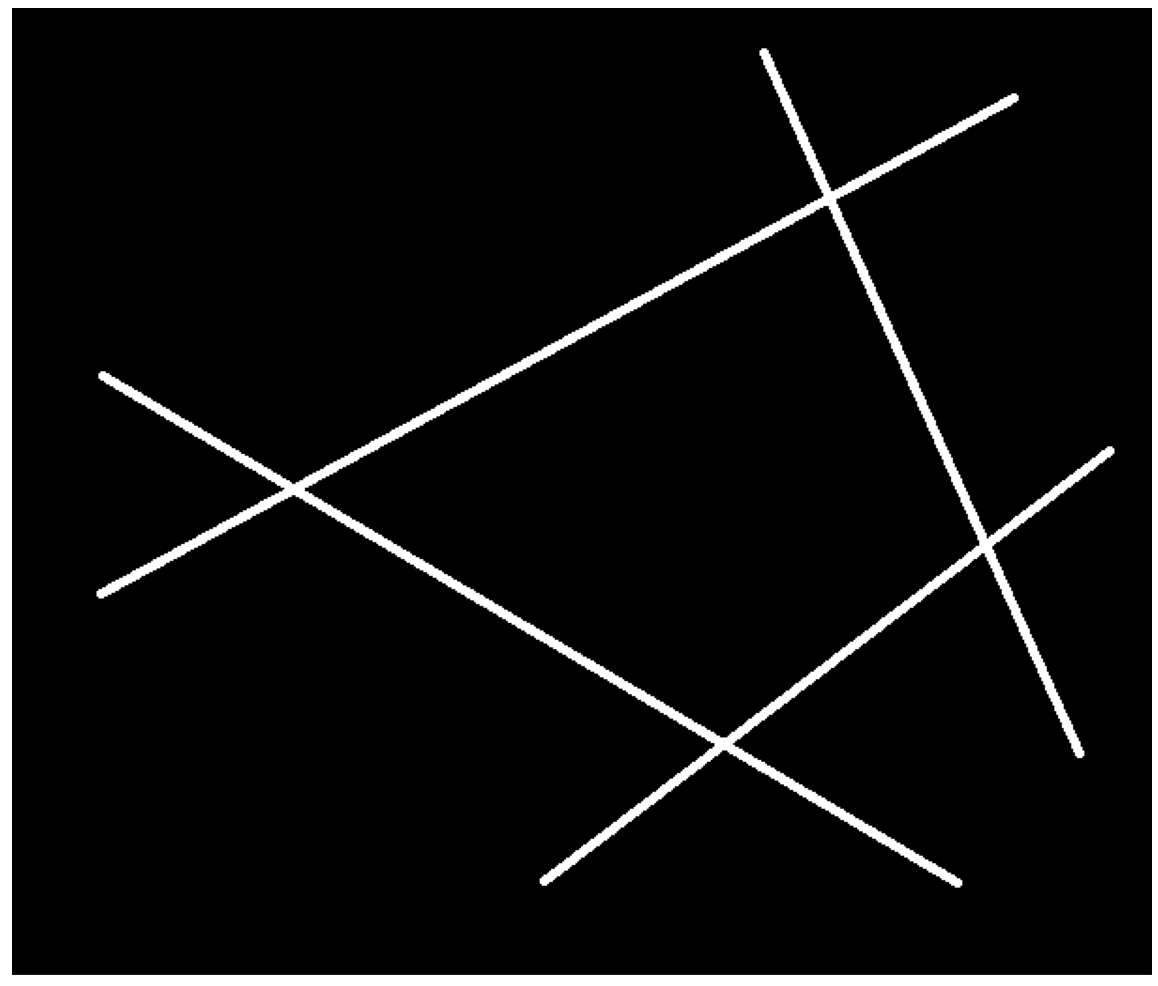

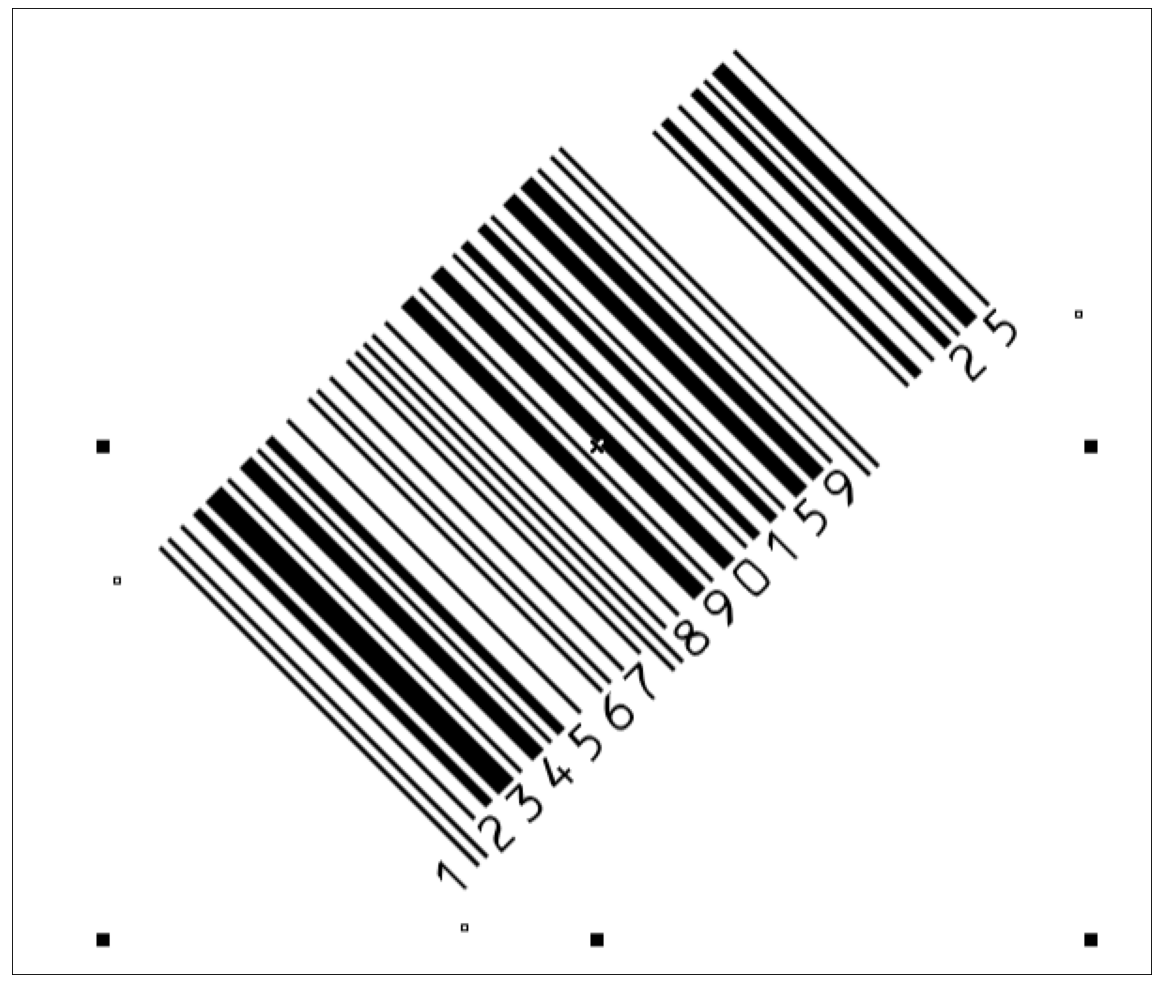

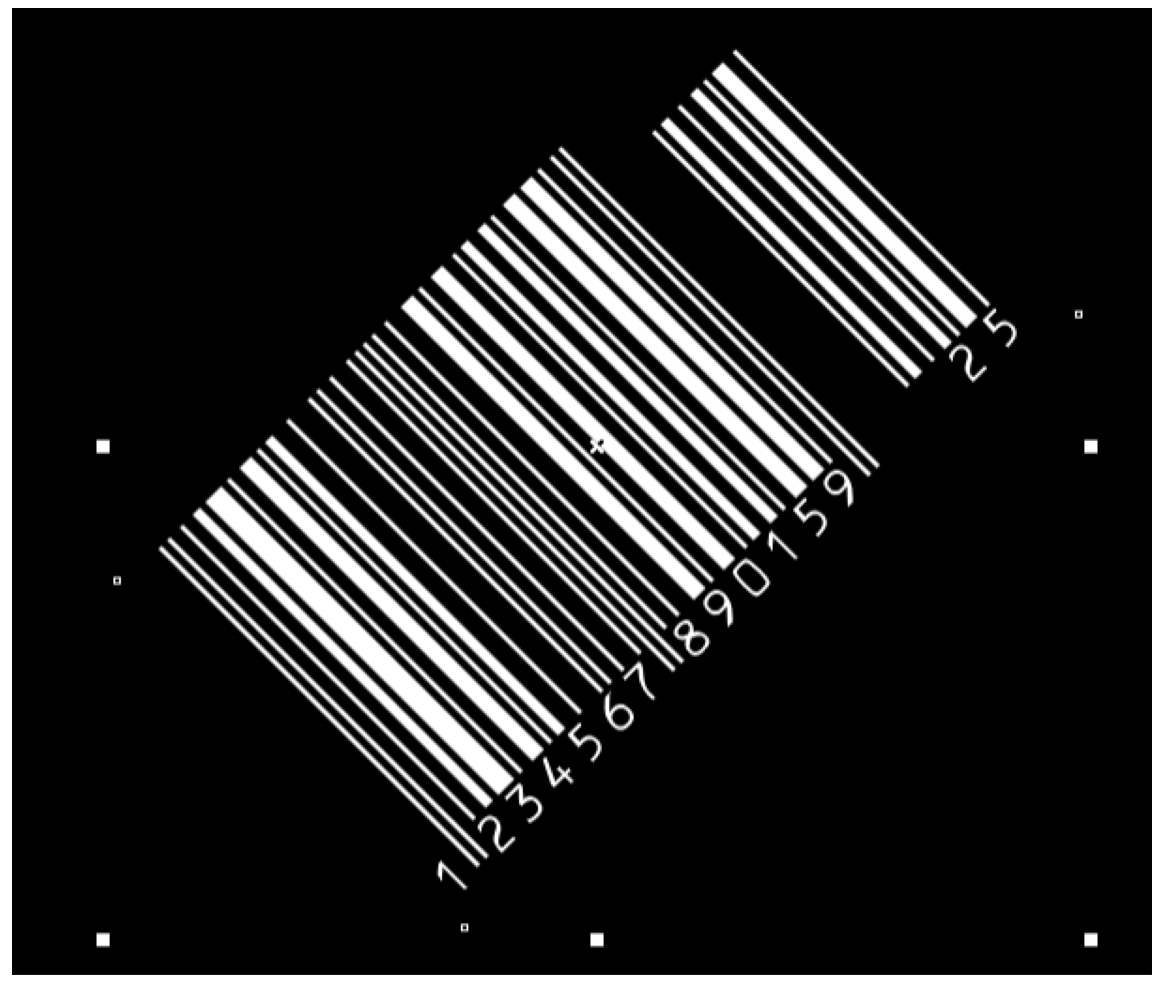

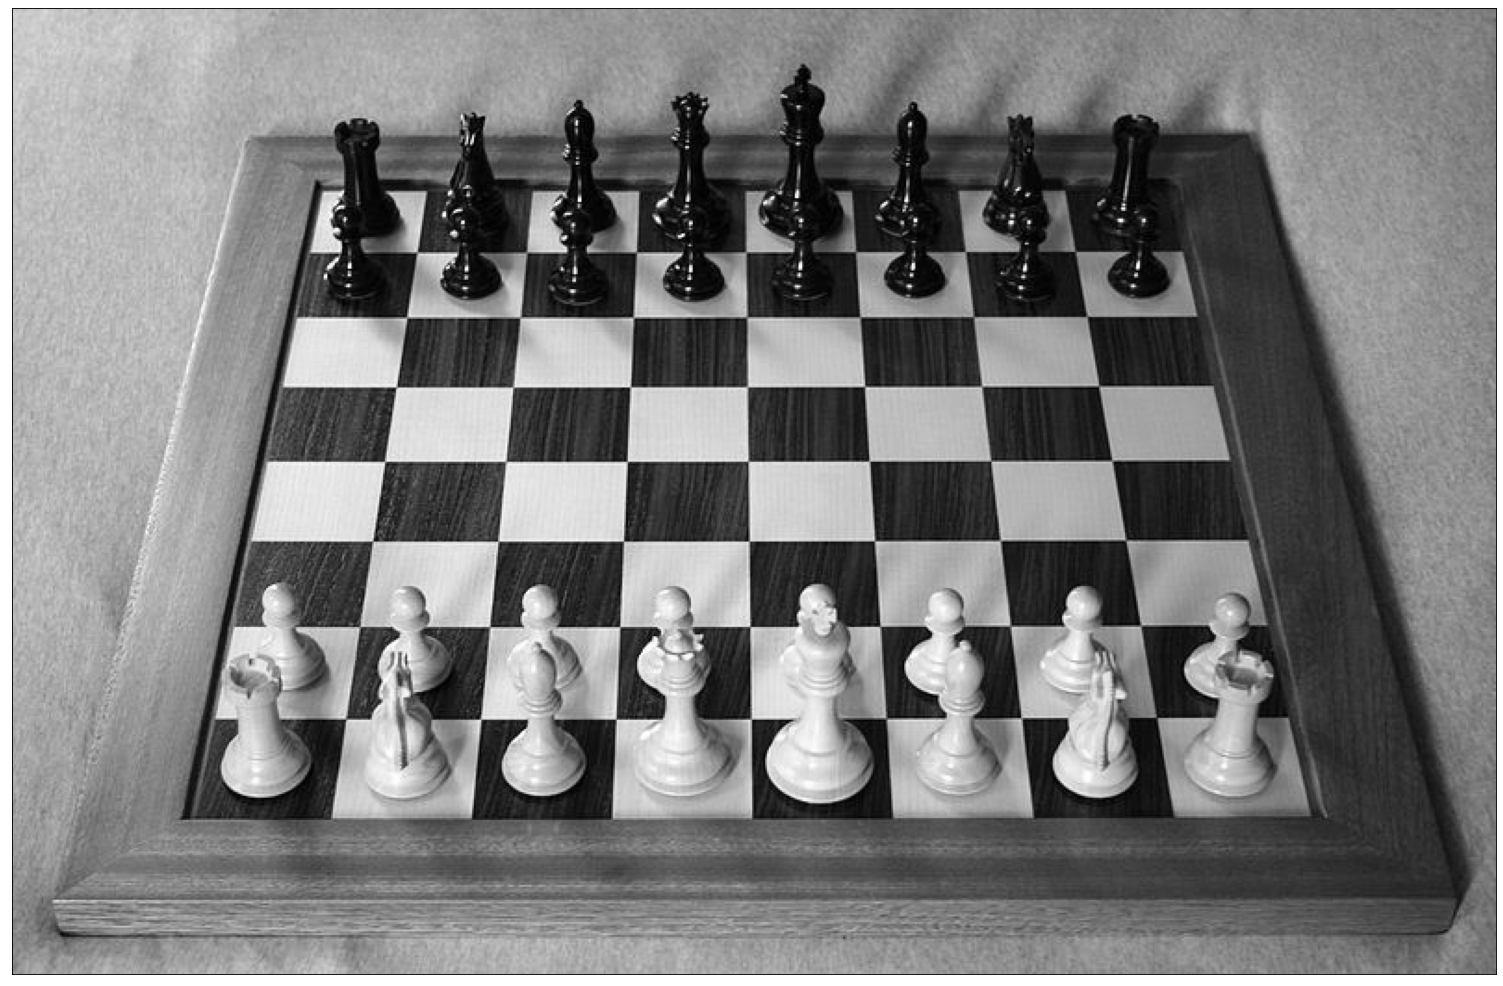

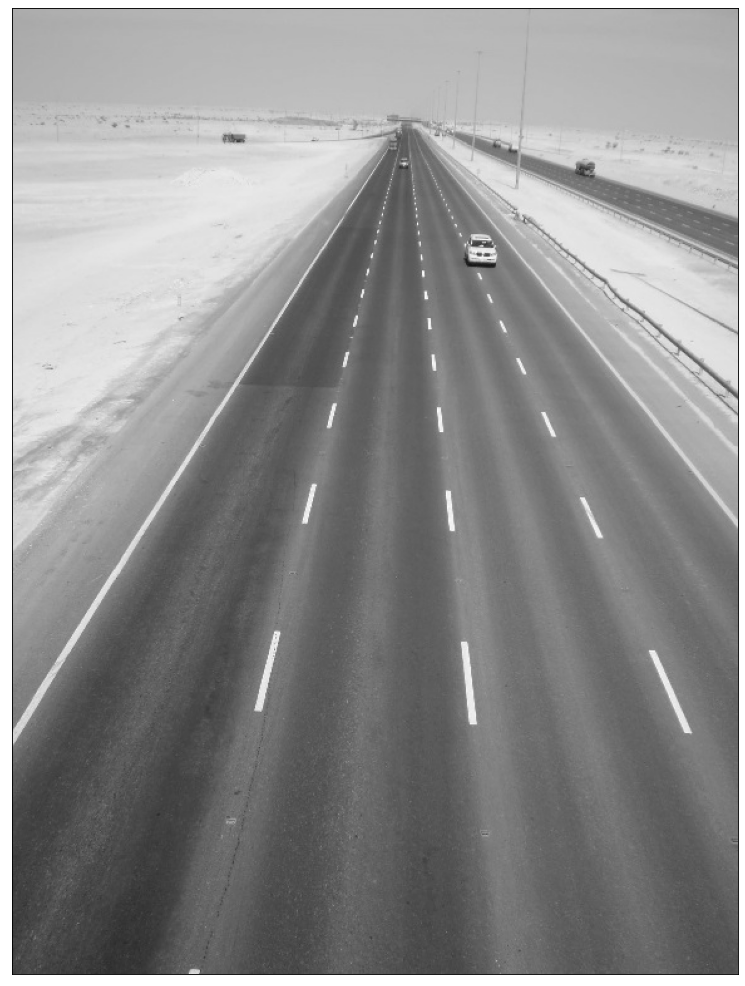

In [3]:
if use_graph:
    for image in images:
        figure(figsize=(32, 16), dpi=80)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
        plt.xticks([]),plt.yticks([])
        plt.show()

In [4]:
# Поиск прямых через преобразование Хафа для исходного изображения.
if use_graph:
    hough_line = []
    for image in images:
        angle_step_deg = 0.1
        tested_angles = np.linspace(- np.pi / 2, np.pi / 2, int(round(360 / angle_step_deg)), endpoint=False)
        hough, theta, d = skimage.transform.hough_line(image, theta=tested_angles)
        hough_line.append((hough, theta, d))

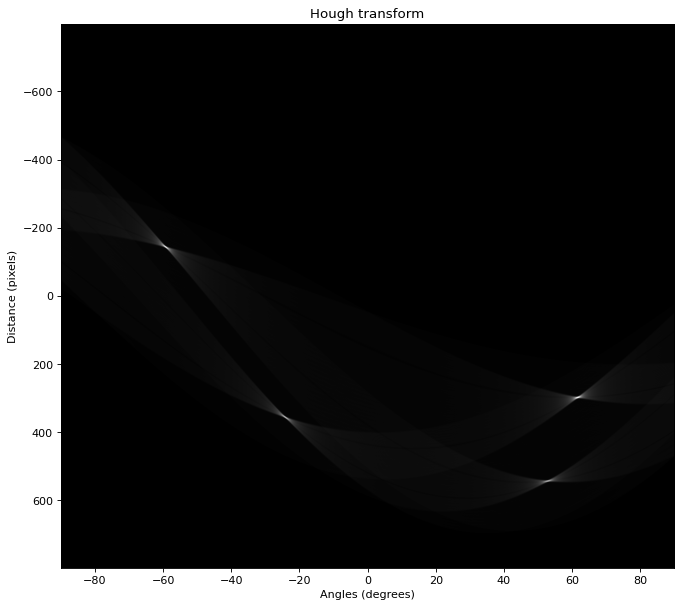

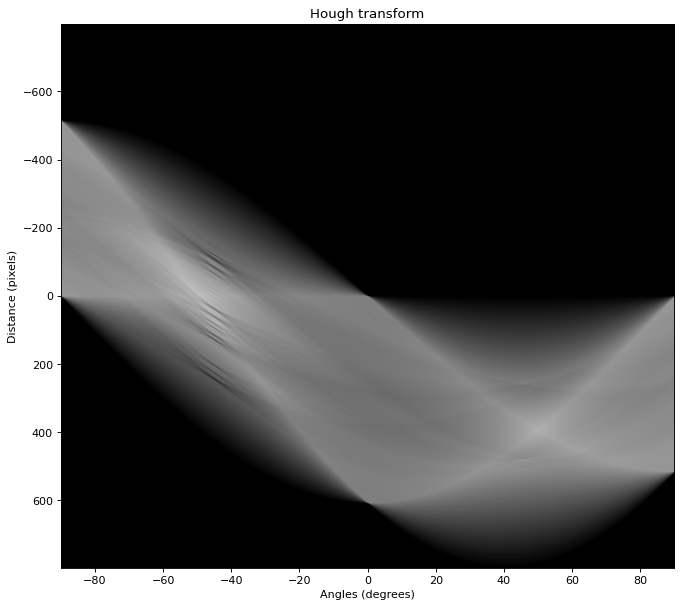

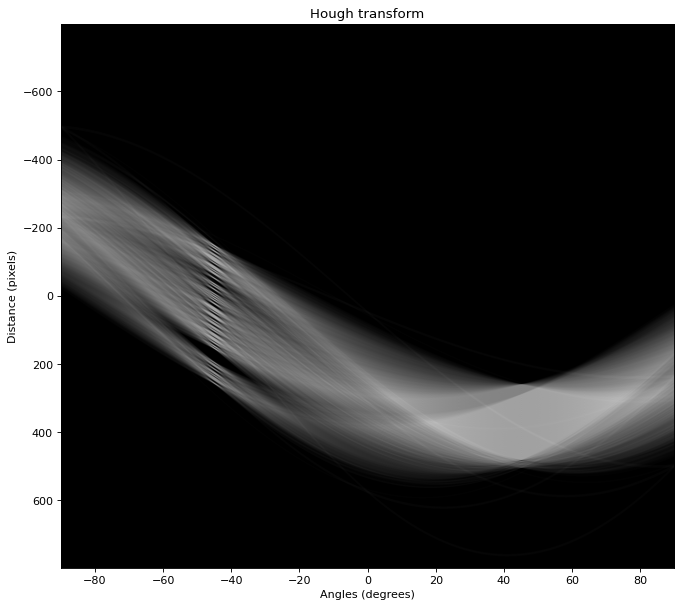

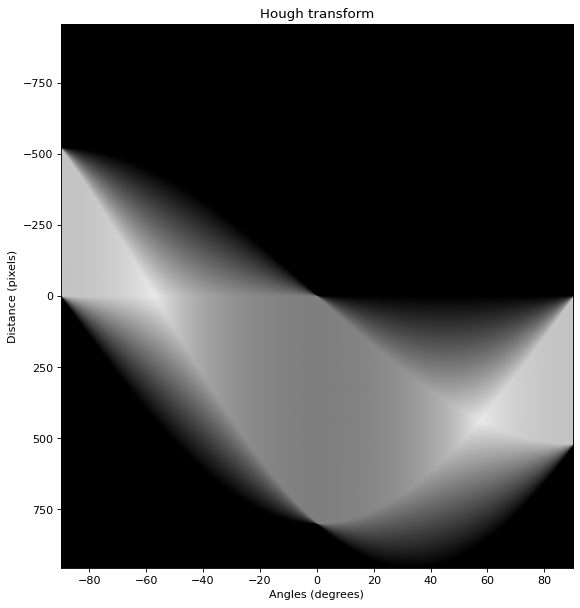

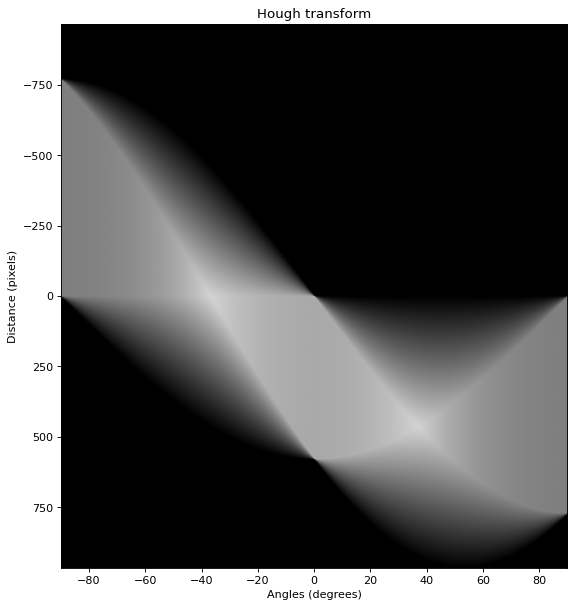

In [5]:
# Отображение аккумулятора Хафа.
if use_graph:
    for hough in hough_line:
        fig = figure(figsize=(16, 9), dpi=80)
        angle_step = 0.5 * np.diff(hough[1]).mean()
        d_step = 0.5 * np.diff(hough[2]).mean()
        bounds = [np.rad2deg(hough[1][0] - angle_step),
                  np.rad2deg(hough[1][-1] + angle_step),
                  hough[2][-1] + d_step, hough[2][0] - d_step]
        plt.imshow(cv2.cvtColor(np.float32(1.0 * hough[0] / np.max(hough[0])), cv2.COLOR_GRAY2RGB), extent=bounds, aspect=0.1)
        plt.title('Hough transform')
        plt.xlabel('Angles (degrees)')
        plt.ylabel('Distance (pixels)')
        plt.show()

Очевидно, что корректно себя показали только изображения с белым цветом на чёрном фоне 
(первое изображение скрещивающихся линий и инвертированный штрих код)

На инвертированном штрих коде видно метсто наибольшего скопления линий под углом около -45 градусов с разными d, 
это множество вертикальных линий штрих кода, а примерно на 45 видны потенциальные линии, проходящие вдоль штрих кода.

Теперь можно извлечь пики аккумулятора.

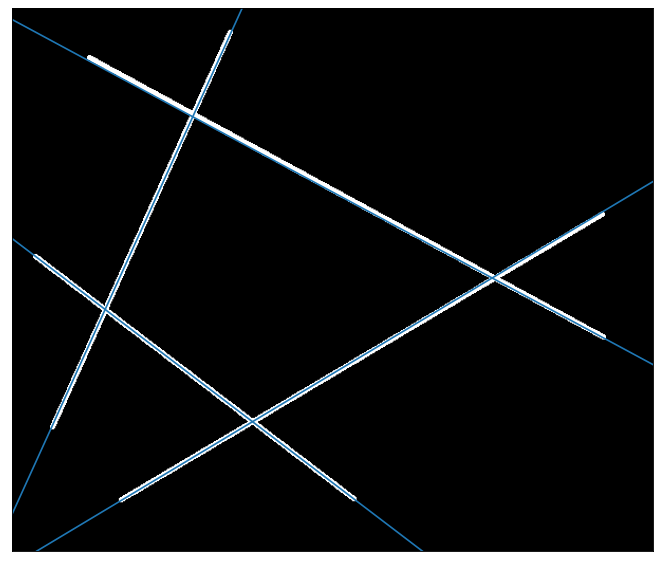

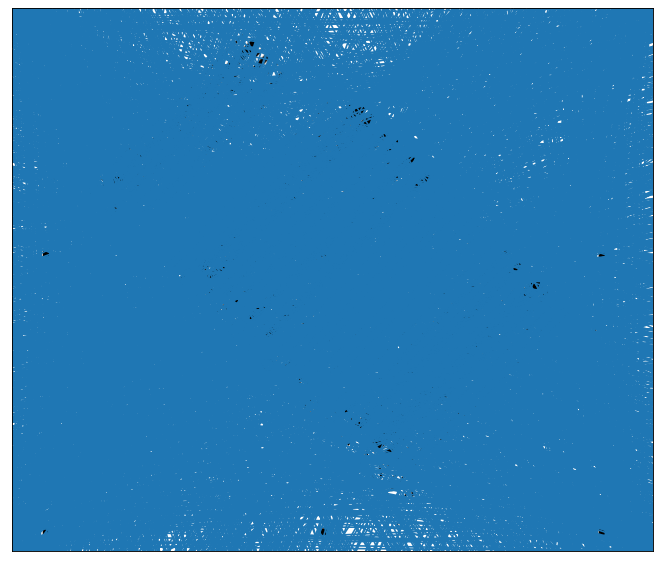

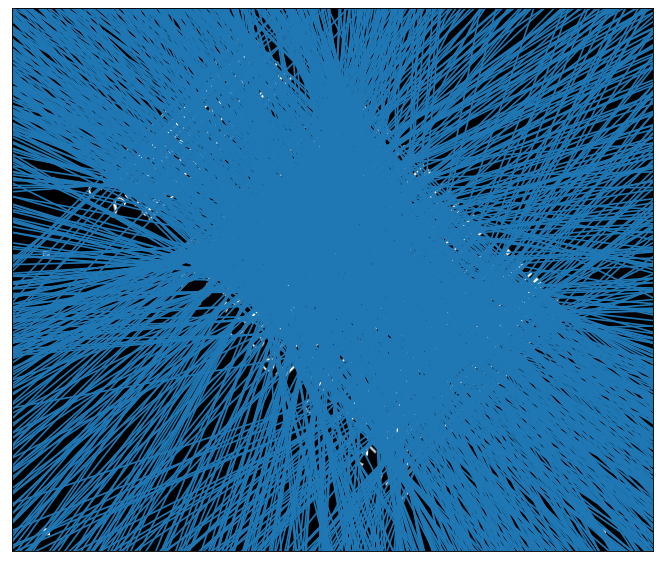

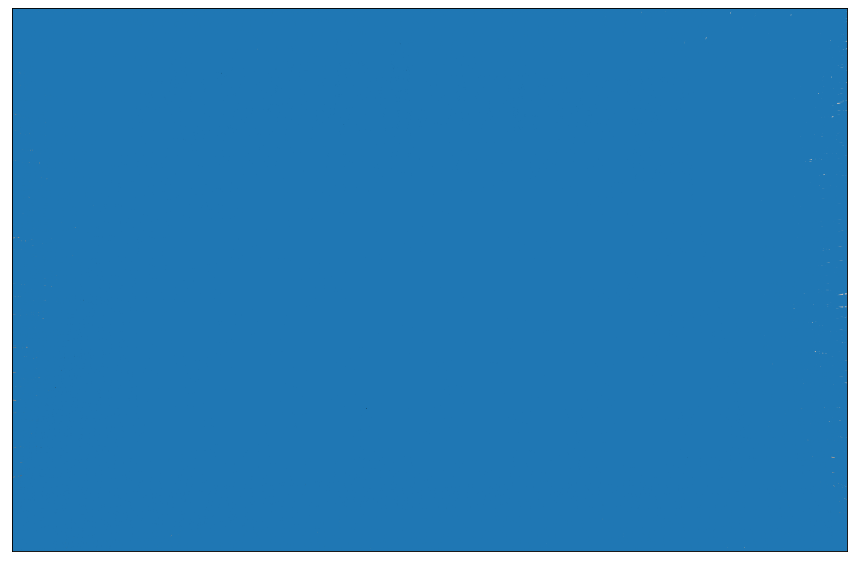

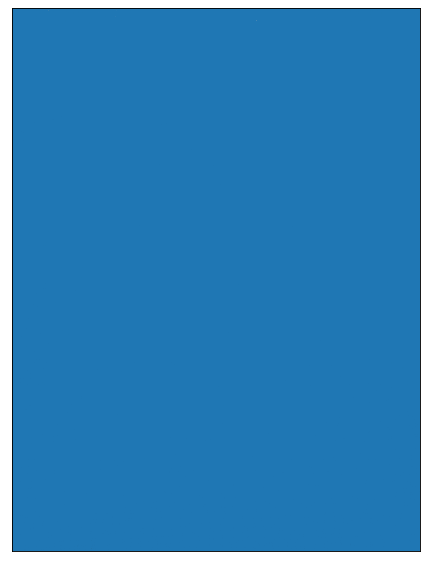

In [6]:
# Отображение прямых внутри аккумулятора Хафа.
if use_graph:
    for index in range(len(images)):
        fig = figure(figsize=(16, 9), dpi=80)
        hough, theta, d = hough_line[index]
        image = images[index]
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
        plt.xticks([]),plt.yticks([])
        for _, angle, dist in zip(
                *skimage.transform.hough_line_peaks(
                hough, 
                theta, 
                d, 
                threshold=threshold_ku[index] * np.max(hough))):
            (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
            plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
        plt.xlim((image.shape[1], 0))
        plt.ylim((image.shape[0], 0))
        plt.show()

На изображениях, изначально не похожих на контура, результат похож больше на Хаос, чем на набор прямых.

In [7]:
# Контуры изображений методом Кенни исходных изображений с линиями
edges = [cv2.Canny(image, 50, 300) for image in images]

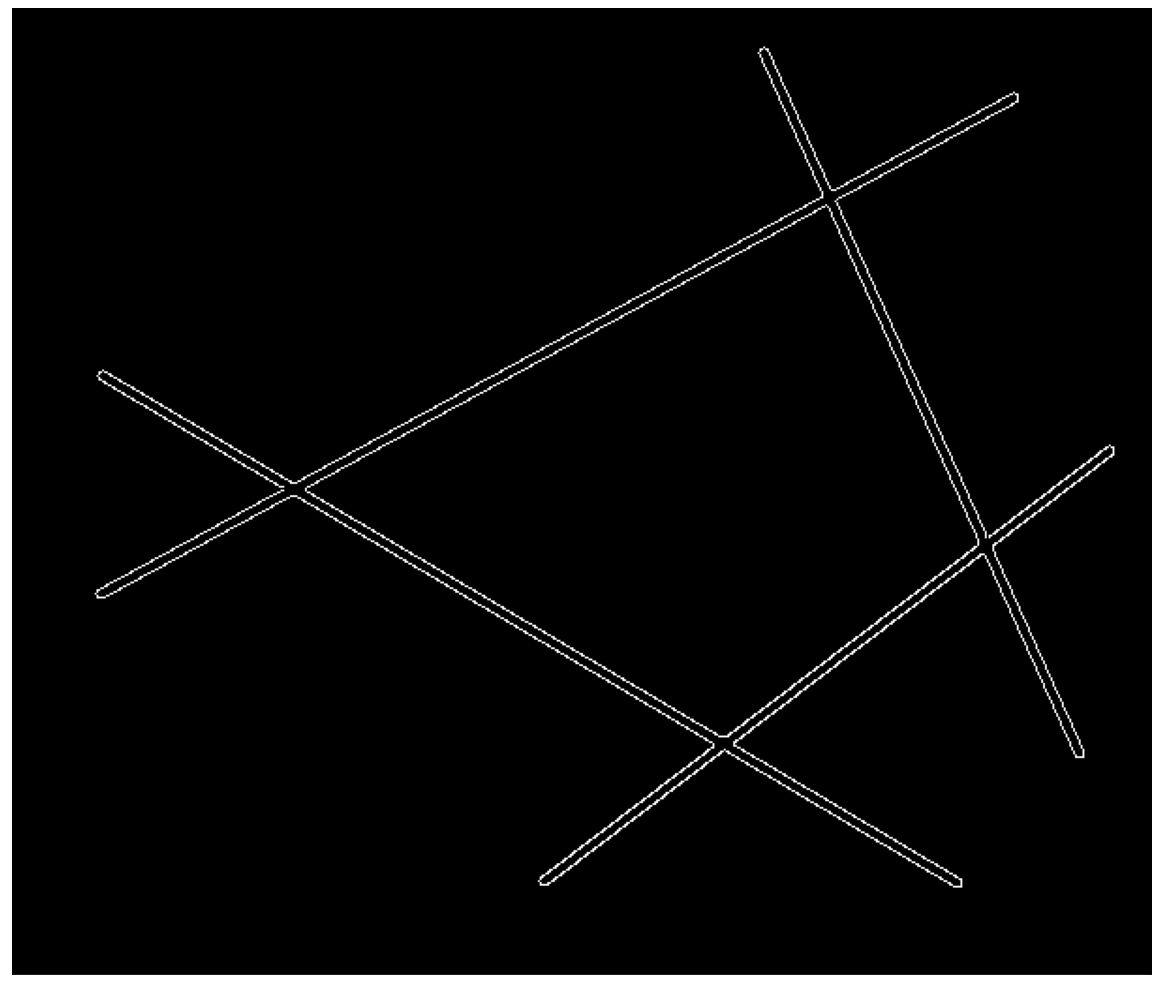

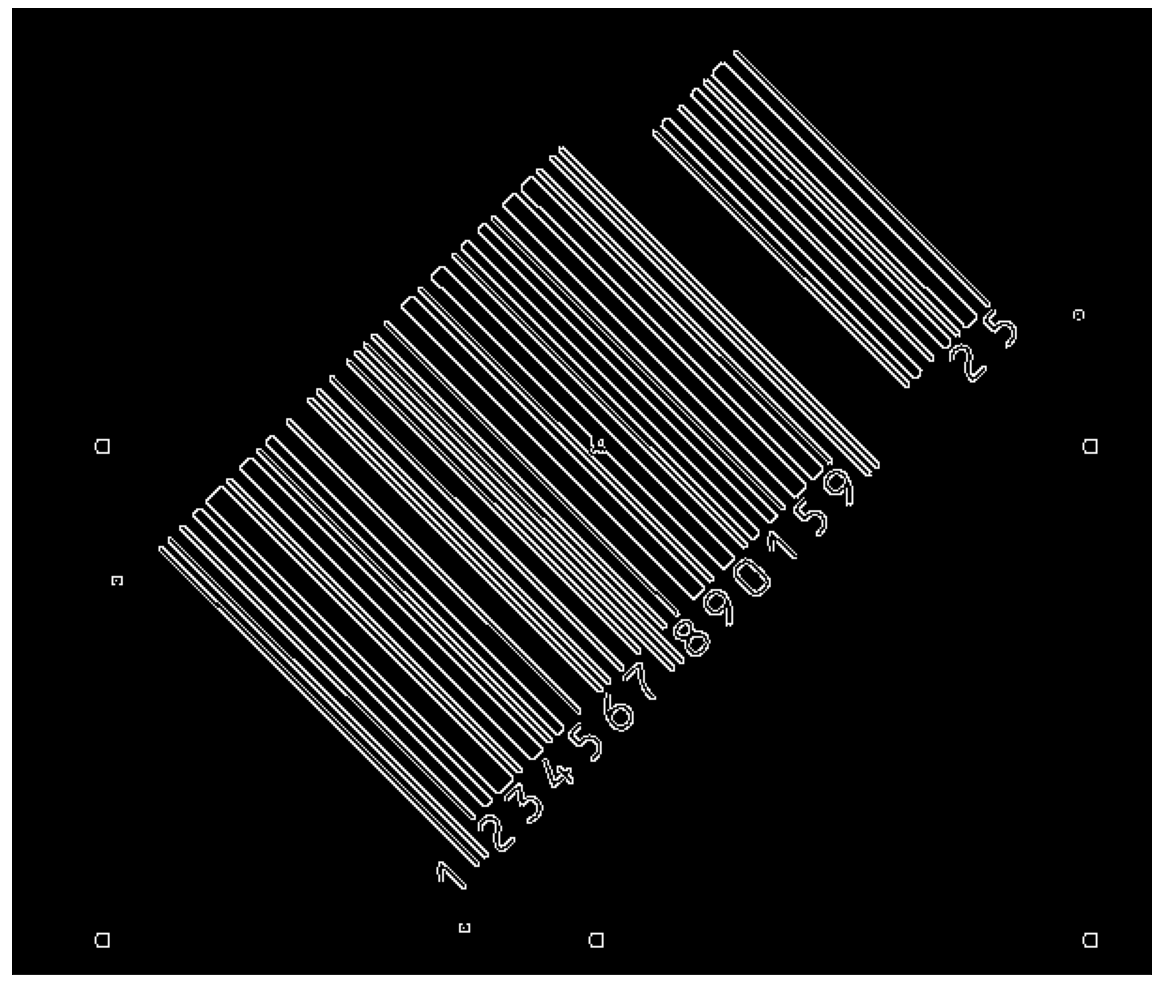

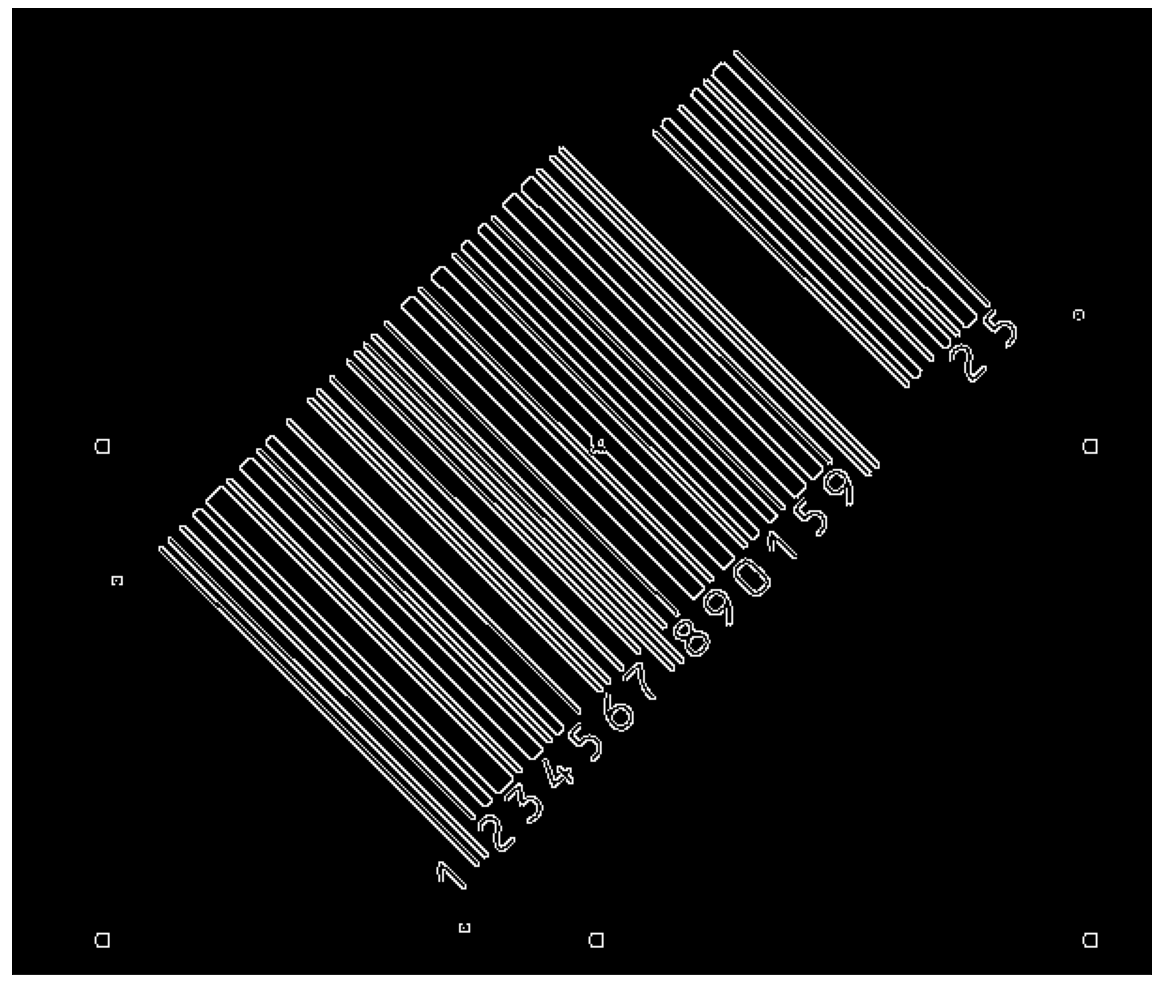

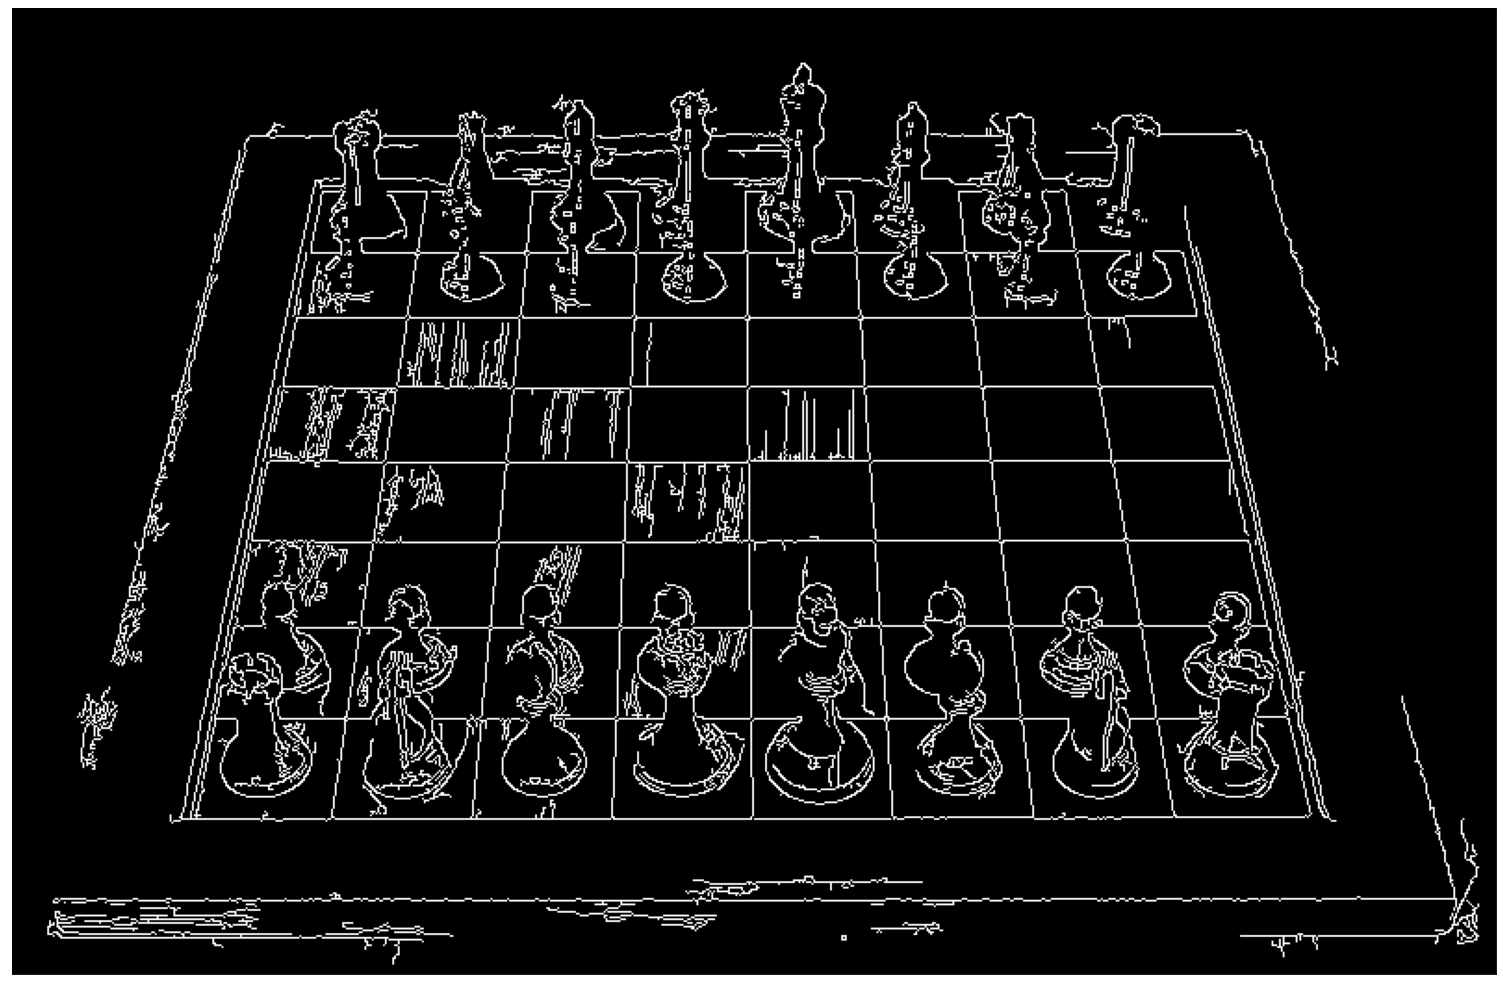

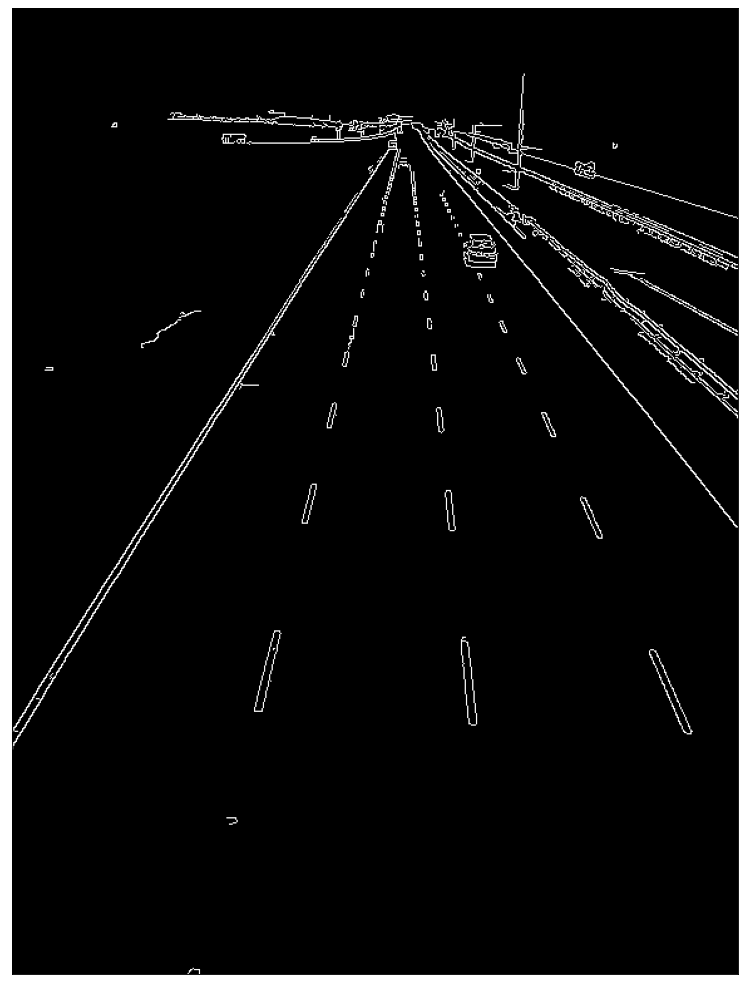

In [8]:
if use_graph:
    for image in edges:
        figure(figsize=(32, 16), dpi=80)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
        plt.xticks([]),plt.yticks([])
        plt.show()

In [9]:
# Поиск прямых через преобразование Хафа для контуров изображений.
if use_graph:
    hough_line = []
    for image in edges:
        angle_step_deg = 0.1
        tested_angles = np.linspace(- np.pi / 2, np.pi / 2, int(round(360 / angle_step_deg)), endpoint=False)
        hough, theta, d = skimage.transform.hough_line(image, theta=tested_angles)
        hough_line.append((hough, theta, d))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


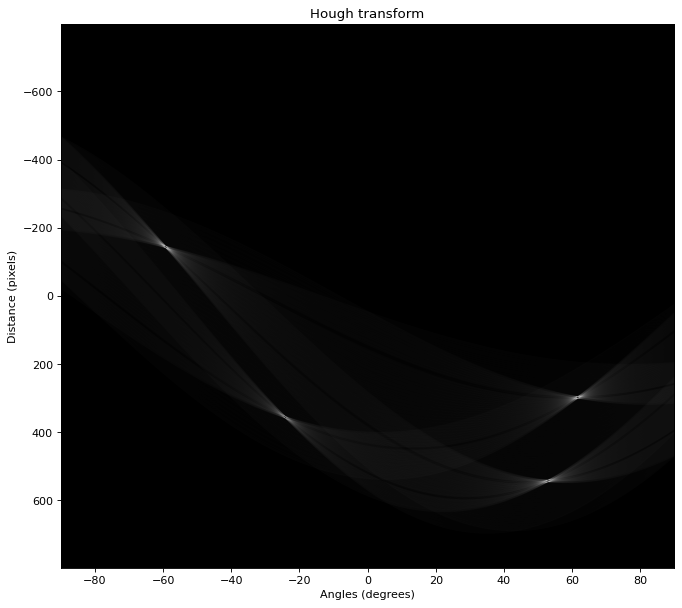

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


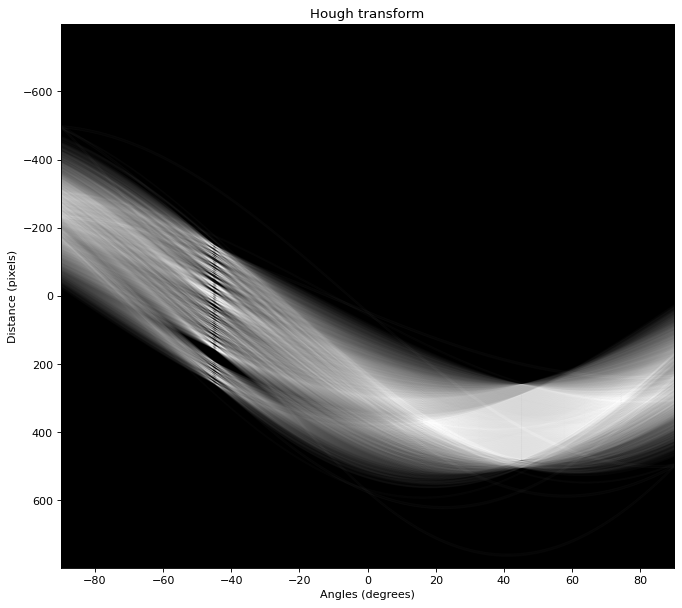

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


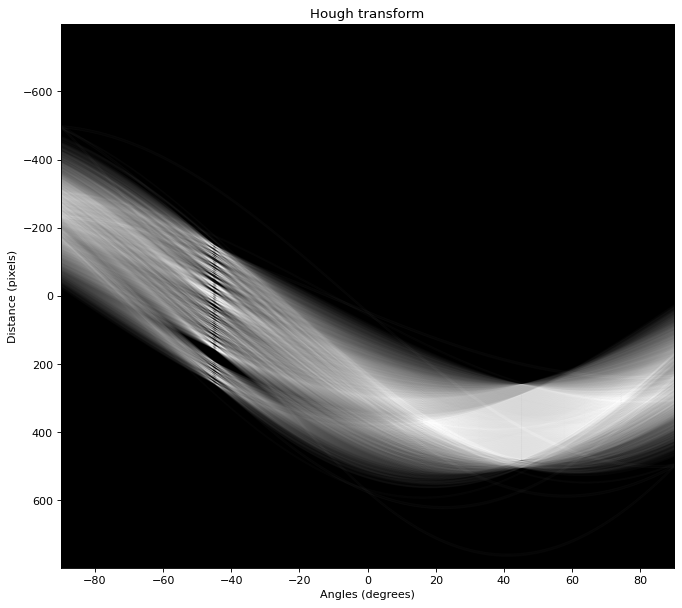

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


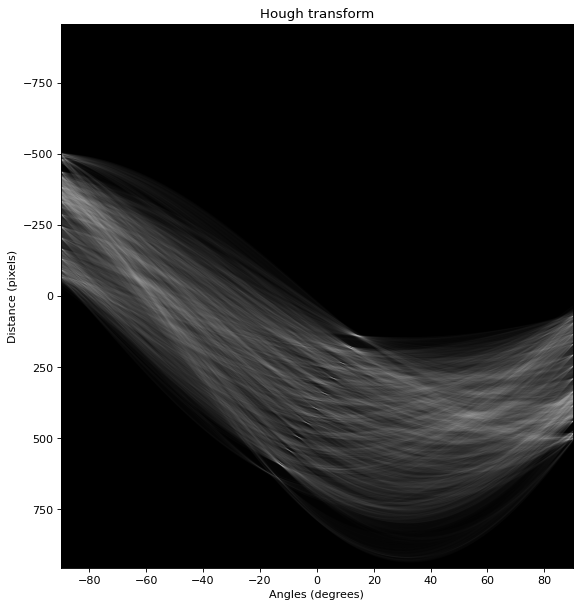

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


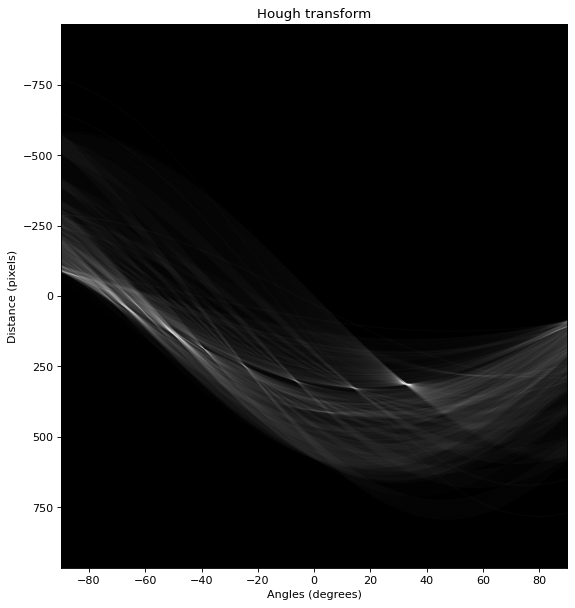

In [10]:
# Отображение усиленного в 3 раза аккумулятора Хафа для контуров изображений.
if use_graph:
    for hough in hough_line:
        fig = figure(figsize=(16, 9), dpi=80)
        angle_step = 0.5 * np.diff(hough[1]).mean()
        d_step = 0.5 * np.diff(hough[2]).mean()
        bounds = [np.rad2deg(hough[1][0] - angle_step),
                  np.rad2deg(hough[1][-1] + angle_step),
                  hough[2][-1] + d_step, hough[2][0] - d_step]
        plt.imshow(cv2.cvtColor(np.float32(3.0 * hough[0] / np.max(hough[0])), cv2.COLOR_GRAY2RGB), extent=bounds, aspect=0.1)
        plt.title('Hough transform')
        plt.xlabel('Angles (degrees)')
        plt.ylabel('Distance (pixels)')
        plt.show()

Теперь корректно ведут себя все пики.

Из 1 изображения в пространстве Хафа очевидно наличие 4 прямых; 

из 2 и 3 наличие сильных множеств параллельных прямых с разницей в высоте между ними и 
менее сильного множества прямых друг над другом без разницы в высоте; 

из 4 наличие множества прямых со схожими 
коэффициентами наклона, но разными высотами и сильного множества вертикальных прямых на различном расстоянии 
между собой; 

из 5 видно около 8-12 явных пиков линий, и кажется в пространстве Хафа их точки описывают синусоиду, как должны,
в теории, множества прямых, проходыщиъ через 1 точку.

Интересное пространство, но идея параметризации изображения интереснее одного из его методов.

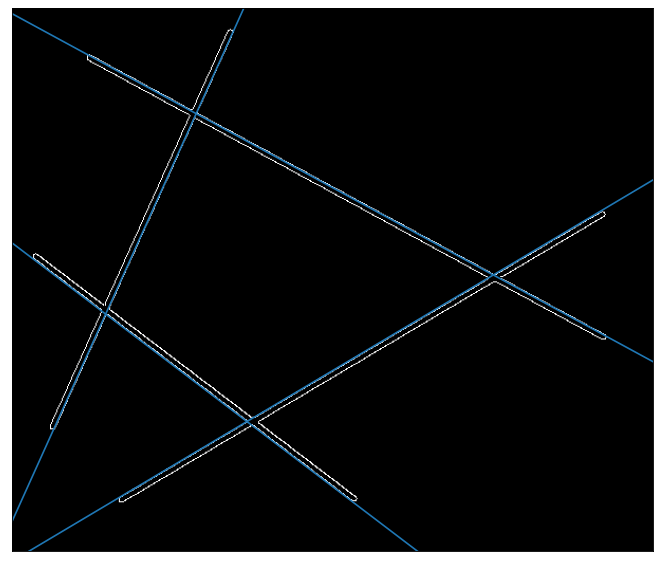

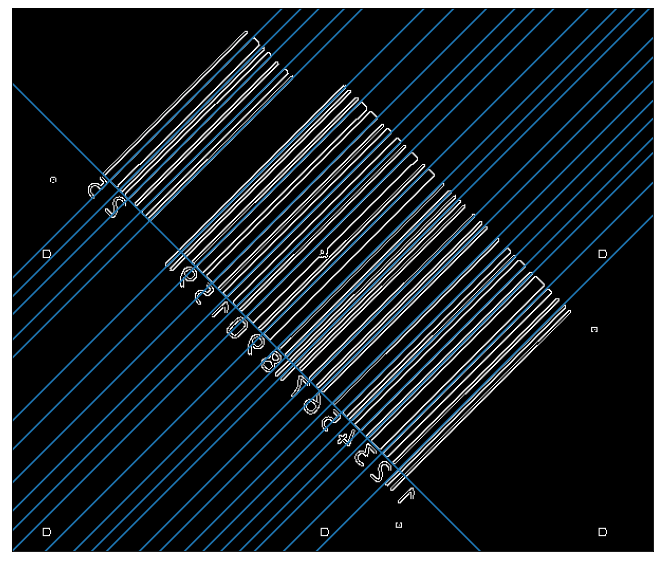

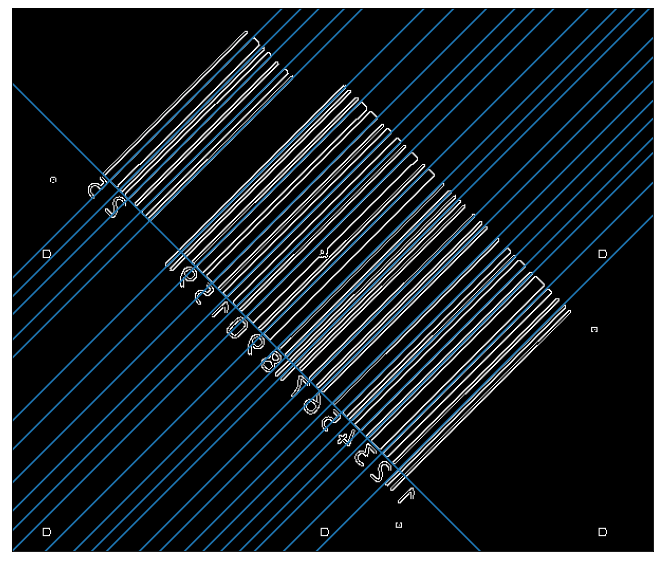

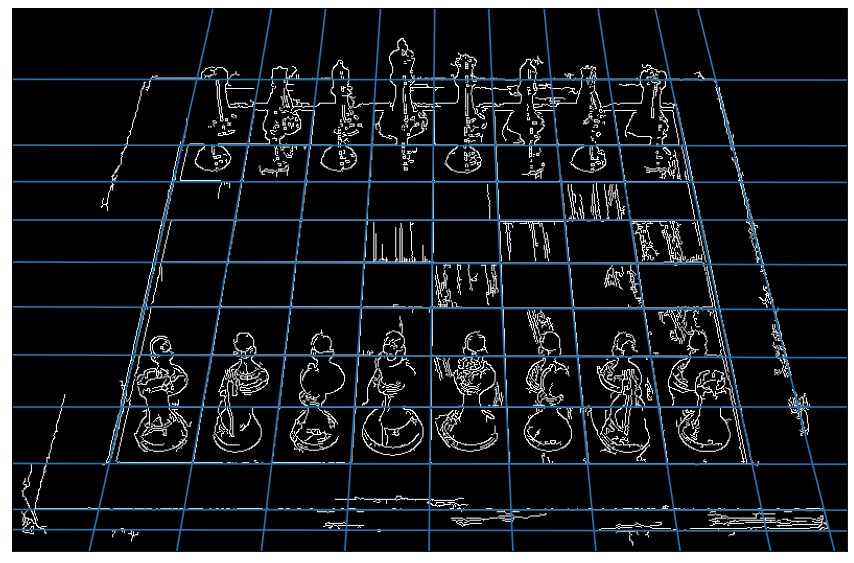

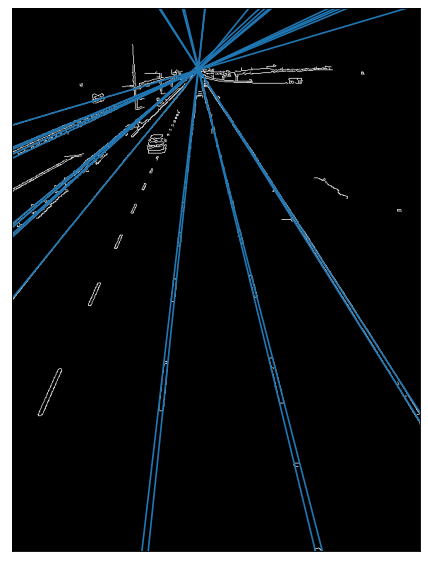

In [11]:
# Отображение прямых внутри аккумулятора Хафа для контуров изображений.
if use_graph:
    for index in range(len(images)):
        fig = figure(figsize=(16, 9), dpi=80)
        hough, theta, d = hough_line[index]
        image = edges[index]
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
        plt.xticks([]),plt.yticks([])
        for _, angle, dist in zip(
                *skimage.transform.hough_line_peaks(
                hough, 
                theta, 
                d, 
                threshold=threshold_ku[index] * np.max(hough))):
            (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
            plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
        plt.xlim((image.shape[1], 0))
        plt.ylim((image.shape[0], 0))
        plt.show()

Для поиска краёв линий нужно воспользоваться "progressive probabilistic line Hough transform"

In [12]:
if use_graph:
    probabilistic_hough_line = []
    for index, image in enumerate(edges):
        lines = skimage.transform.probabilistic_hough_line(image, line_length = line_length[index], line_gap=3)
        probabilistic_hough_line.append(lines)

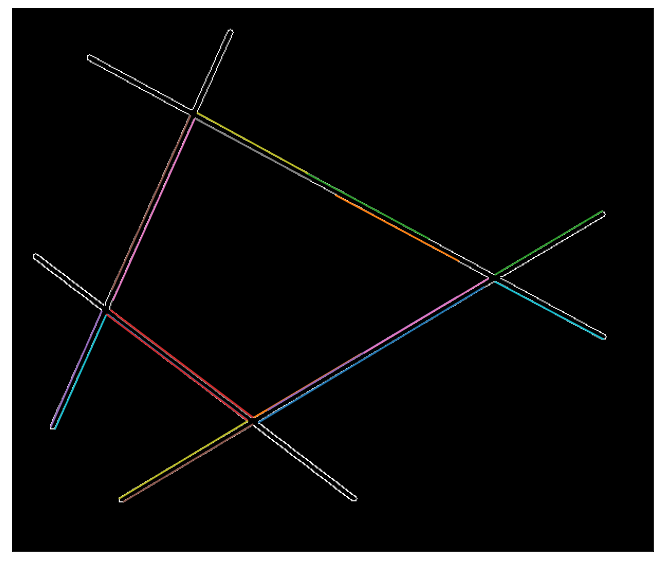

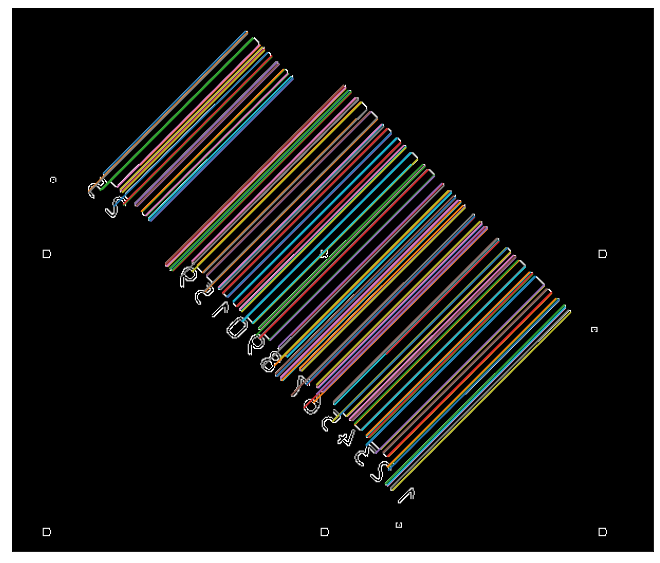

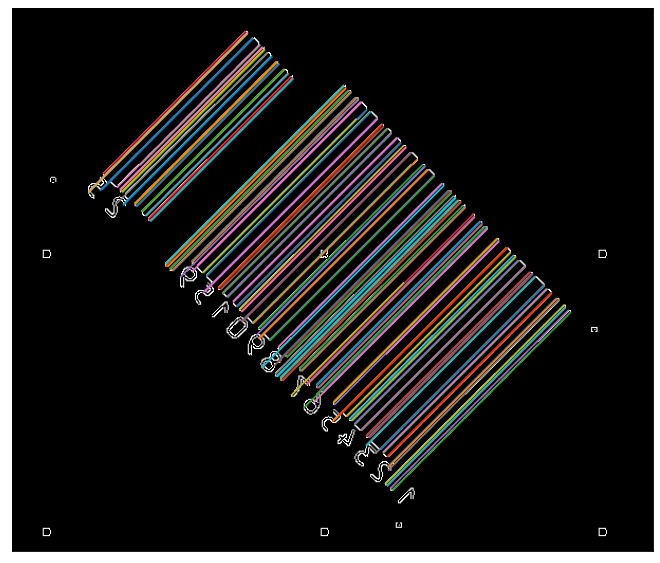

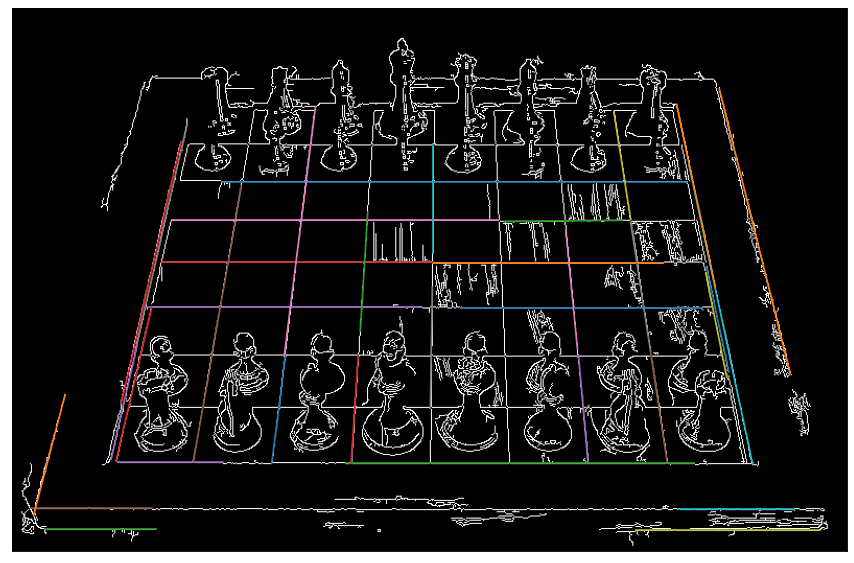

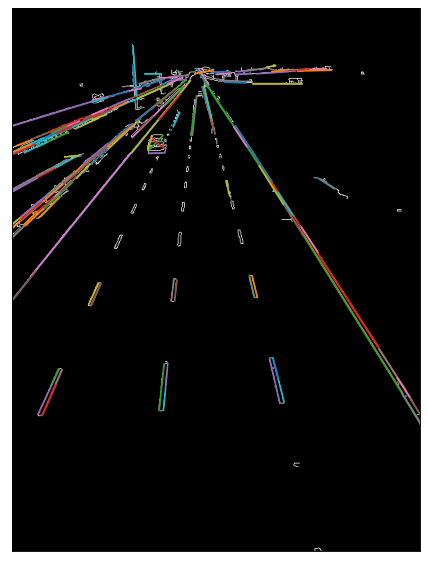

In [13]:
if use_graph:
    for index in range(len(images)):
        fig = figure(figsize=(16, 9), dpi=80)
        lines = probabilistic_hough_line[index]
        image = edges[index]
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
        plt.xticks([]),plt.yticks([])
        for line in lines:
            p0, p1 = line
            plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
        plt.xlim((image.shape[1], 0))
        plt.ylim((image.shape[0], 0))
        plt.show()

Сложно сказать, какая длина у обнаруженных линий, 
но можно точно сказать, что на всех фото, кроме последнего, 
длина линий больше 100, а на последнем больше 20.

Про "Generalized Hough Transform" идеально понятно рассказано тут.

https://www.youtube.com/watch?v=_mGxmZWs9Zw